In [1]:
%load_ext autotime
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from activation import Activation
from preprocessing import PreProcess
from neural_net import NeuralNetwork
from layers import Dense
from other import accuracy_score, CrossEntropy, StochasticGradientDescent as SGD

time: 927 ms


In [3]:
def custom_neural_network(num_hidden_layer=1, num_neurons=100, learning_rate=0.1, \
                          activation='sigmoid', print_summary=True):   
    network = NeuralNetwork(optimizer= SGD(learning_rate=learning_rate), loss=CrossEntropy)
    network.add(Dense(num_neurons, input_shape=(8404,))).add(Activation(activation))
    for i in range(1, num_hidden_layer):
        network.add(Dense(num_neurons))
        network.add(Activation(activation))
    network.add(Dense(2)).add(Activation('softmax'))
    if print_summary:
        network.summary()
    return network

time: 3.89 ms


In [4]:
pre = PreProcess("Assignment_4_data.txt")
X_train, X_test, y_train, y_test = pre.process(test_size=0.2) 
n_features = X_train.shape[1]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((4457, 8404), (1115, 8404), (4457, 1), (1115, 1))
time: 5.3 s


In [5]:
network = custom_neural_network(num_hidden_layer=2, num_neurons=100, \
                                learning_rate=0.1, print_summary=True)

+---------------+
| Model Summary |
+---------------+
Input Shape: (8404,)
+----------------------+------------+--------------+
| Layer Type           | Parameters | Output Shape |
+----------------------+------------+--------------+
| Dense                | 840500     | (100,)       |
| Activation (Sigmoid) | 0          | (100,)       |
| Dense                | 10100      | (100,)       |
| Activation (Sigmoid) | 0          | (100,)       |
| Dense                | 202        | (2,)         |
| Activation (Softmax) | 0          | (2,)         |
+----------------------+------------+--------------+
Total Parameters: 850802

time: 11.1 ms


In [6]:
train_err, _ = network.fit(X_train, y_train, n_epochs=50, batch_size=100)
_, accuracy = network.test_on_batch(X_test, y_test)
print("Accuracy:", accuracy)

('Accuracy:', 0)
time: 22.7 s


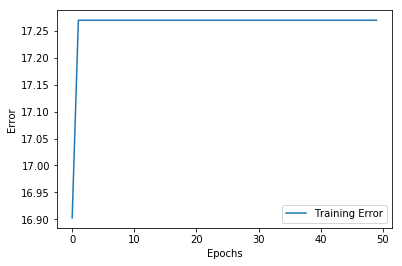

time: 105 ms


In [7]:
epoch = range(len(train_err))
plt.plot(epoch, train_err, label="Training Error")
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.legend()
plt.show()